## Rxday and ROME - all models + obs

In [2]:
import xarray as xr
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import seaborn as sns

from os.path import expanduser
home = expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

In [3]:
models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 # cannot concatanate files for rcp85 run
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]


experiments = [
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]


obs = {'GPCP':True}


rome_options = [
    'rome',
    # 'rome_n'
    ]
rome_option = rome_options[0]


rxday_options = [
    'rx1day',
    # 'rx5day'
    ]
rxday_option = rxday_options[0]

## Climatology

### time mean

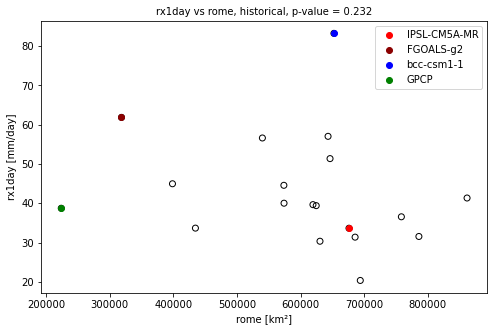

In [6]:
y= []
x= []
for model in models:
    folder = home + '/Documents/data/cmip5/' + model
    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)
    x = np.append(x, rome[rome_option].mean(dim='time'))

    fileName = model + '_pr_rxday_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    y = np.append(y, ds[rxday_option].weighted(np.cos(np.deg2rad(ds.lat))).mean(dim=('lat','lon')).mean(dim='time'))

res= stats.pearsonr(x,y)

if obs['GPCP']:
    folder = home + '/Documents/data/obs/GPCP'
    fileName = 'GPCP_rome.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    x = np.append(x, ds[rome_option].mean(dim='time'))

    folder = home + '/Documents/data/obs/GPCP'
    fileName = 'GPCP_rxday.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    y = np.append(y, ds[rxday_option].weighted(np.cos(np.deg2rad(ds.lat))).mean(dim=('lat','lon')).mean(dim='time'))


fig = plt.figure(figsize=(8,5))
plt.scatter(x,y,facecolors='none', edgecolor='k')

#plt.text(3e5, 80,'R$^2$: '+ str(round(res[0]**2,3)),fontsize=10)
#plt.text(3e5, 78,'p-value: '+ str(round(res[1],3)),fontsize=10)


x_leg = [models.index('IPSL-CM5A-MR'),models.index('FGOALS-g2'), models.index('bcc-csm1-1'), -1]
label = ['IPSL-CM5A-MR','FGOALS-g2','bcc-csm1-1', 'GPCP']
colors = ['r','darkred','b', 'g']
j=0
for i in x_leg:
    plt.scatter(x[i],y[i],c=colors[j], label=label[j])
    j+=1

plt.title(rxday_option  + ' vs ' + rome_option + ', ' + experiment + ', p-value = '+ str(round(res[1],3)),fontsize=10)
plt.xlabel(rome_option  + ' [km\u00b2]')
plt.ylabel(rxday_option + ' [mm/day]')
plt.legend()


### annual

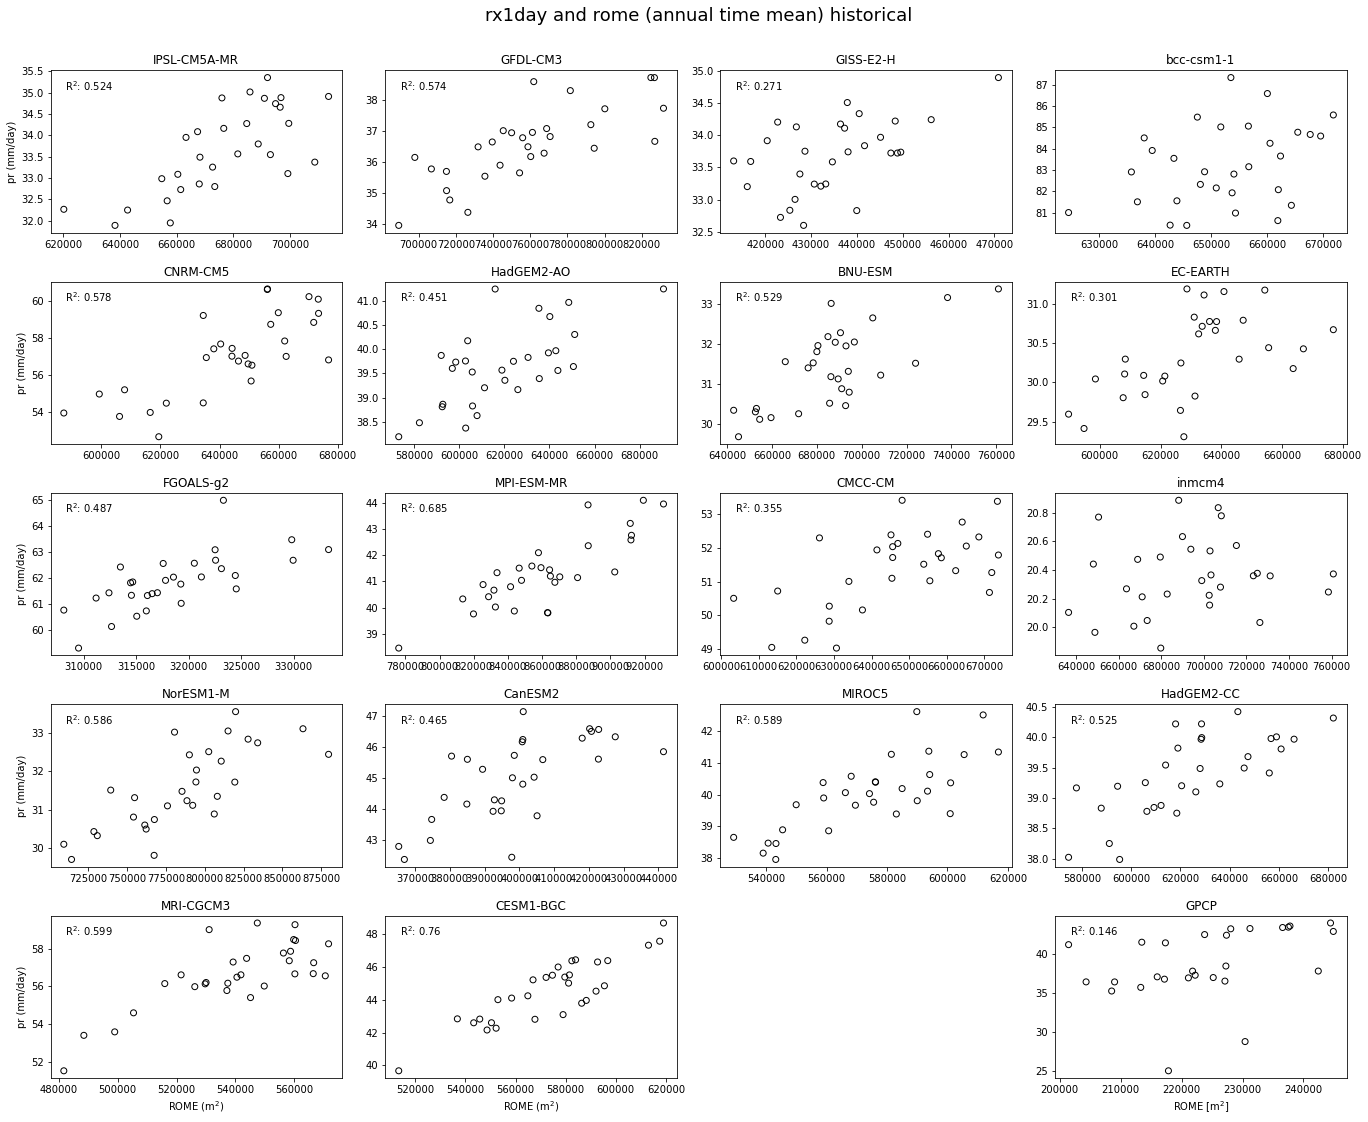

In [7]:
fig= plt.figure(figsize=(22.5,17.5))
fig.suptitle(rxday_option + ' and ' + rome_option  + ' (annual time mean) ' + experiment, fontsize=18, y=0.95)

for i, model in enumerate(models):

    folder = home + '/Documents/data/cmip5/' + model
    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    x = ds[rome_option].resample(time='Y').mean(dim='time')

    fileName = model + '_pr_rxday_' + experiment + '.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    y = ds[rxday_option].weighted(np.cos(np.deg2rad(ds.lat))).mean(dim=('lat','lon'))

    ax= fig.add_subplot(5,4,i+1)
    
    plt.scatter(x,y,facecolors='none', edgecolor='k')

    #ax.spines.right.set_visible(False)
    #ax.spines.top.set_visible(False)

    res= stats.pearsonr(x,y)

    if res[1]<=0.05:
        ax.annotate('R$^2$: '+ str(round(res[0]**2,3)), xy=(0.2, 0.1), xycoords='axes fraction', xytext=(0.05, 0.875), textcoords='axes fraction')


    plt.title(model)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        plt.ylabel('pr (mm/day)')


    if i>=16:
        plt.xlabel('ROME (m$^2$)')



if obs['GPCP']:
    ax= fig.add_subplot(5,4,20)

    folder = home + '/Documents/data/obs/GPCP'
    fileName = 'GPCP_rome.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    x = ds[rome_option].resample(time='Y').mean(dim='time')


    folder = home + '/Documents/data/obs/GPCP'
    fileName = 'GPCP_rxday.nc'
    path = folder + '/' + fileName
    ds = xr.open_dataset(path)
    y = ds[rxday_option].weighted(np.cos(np.deg2rad(ds.lat))).mean(dim=('lat','lon'))

    res= stats.pearsonr(x,y)


    plt.scatter(x,y,facecolors='none', edgecolor='k')
    plt.title('GPCP')
    plt.xlabel('ROME [m$^2$]')

    #ax.spines.right.set_visible(False)
    #ax.spines.top.set_visible(False)

    if res[1]<=0.05:
        ax.annotate('R$^2$: '+ str(round(res[0]**2,3)), xy=(0.2, 0.1), xycoords='axes fraction', xytext=(0.05, 0.875), textcoords='axes fraction')



plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)
#sns.despine(top=True, right=True, left=False, bottom=False)

## Change with warming

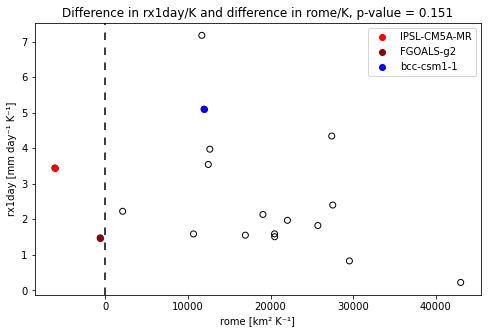

In [10]:
x_diff, y_diff = [], []

for model in models:
    
    folder = home + '/Documents/data/cmip5/' + model
    fileName = model + '_tas_sMean_historical.nc'
    path = folder + '/' + fileName
    tas_sMean = xr.open_dataset(path).tas_sMean
    tas_historical = tas_sMean.mean(dim='time')

    fileName = model + '_tas_sMean_rcp85.nc'
    path = folder + '/' + fileName
    tas_sMean = xr.open_dataset(path).tas_sMean
    tas_rcp = tas_sMean.mean(dim='time')

    tas_diff = tas_rcp - tas_historical


    fileName = model + '_rome_historical.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)
    x_historical = rome[rome_option].mean(dim='time')


    fileName = model + '_rome_rcp85.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)
    x_rcp = rome[rome_option].mean(dim='time')


    x_diff = np.append(x_diff,  (x_rcp - x_historical) / tas_diff)


    fileName = model + '_pr_rxday_historical.nc'
    path = folder + '/' + fileName
    rxday = xr.open_dataset(path)
    y_historical = rxday[rxday_option].weighted(np.cos(np.deg2rad(rxday.lat))).mean(dim=('lat','lon')).mean(dim='time')


    fileName = model + '_pr_rxday_rcp85.nc'
    path = folder + '/' + fileName
    rxday = xr.open_dataset(path)
    y_rcp = rxday[rxday_option].weighted(np.cos(np.deg2rad(rxday.lat))).mean(dim=('lat','lon')).mean(dim='time')


    y_diff  = np.append(y_diff, (y_rcp - y_historical)/tas_diff)





fig = plt.figure(figsize=(8,5))
plt.scatter(x_diff,y_diff,facecolors='none', edgecolor='k')
res= stats.pearsonr(x_diff,y_diff)
#plt.text(3e5, 80,'R$^2$: '+ str(round(res[0]**2,3)),fontsize=10)
# plt.text(-8000, 6,'p-value: '+ str(round(res[1],3)),fontsize=10)


x_leg = [models.index('IPSL-CM5A-MR'),models.index('FGOALS-g2'), models.index('bcc-csm1-1')]
label = ['IPSL-CM5A-MR','FGOALS-g2','bcc-csm1-1']
colors = ['r','darkred','b']
j=0
for i in x_leg:
    plt.scatter(x_diff[i],y_diff[i],c=colors[j], label=label[j])
    j+=1

plt.title('Difference in ' + rxday_option  + '/K and difference in ' + rome_option + '/K, p-value = '+ str(round(res[1],3)))
plt.axvline(0, color='k',linestyle= (0, (5, 5)))
plt.xlabel(rome_option  + ' [km\u00b2' + ' K' + chr(0x207B) + chr(0x00B9) + ']')
plt.ylabel(rxday_option + ' [mm day' + chr(0x207B) + chr(0x00B9) + ' K' + chr(0x207B) + chr(0x00B9) + ']')
plt.legend()



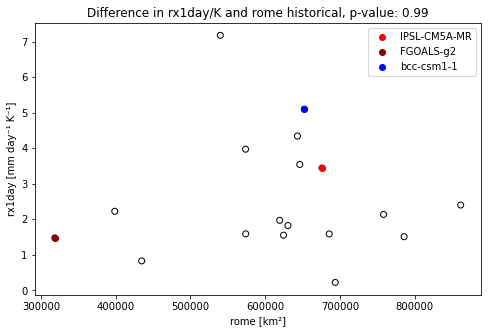

In [11]:
x, y_diff = [], []

for model in models:

    folder = home + '/Documents/data/cmip5/' + model
    fileName = model + '_tas_sMean_historical.nc'
    path = folder + '/' + fileName
    tas_sMean = xr.open_dataset(path).tas_sMean
    tas_historical = tas_sMean.mean(dim='time')

    fileName = model + '_tas_sMean_rcp85.nc'
    path = folder + '/' + fileName
    tas_sMean = xr.open_dataset(path).tas_sMean
    tas_rcp = tas_sMean.mean(dim='time')

    tas_diff = tas_rcp - tas_historical


    fileName = model + '_rome_historical.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)
    x_historical = rome[rome_option].mean(dim='time')


    fileName = model + '_rome_rcp85.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)
    x_rcp = rome[rome_option].mean(dim='time')


    x = np.append(x,  x_historical)


    fileName = model + '_pr_rxday_historical.nc'
    path = folder + '/' + fileName
    rxday = xr.open_dataset(path)
    y_historical = rxday[rxday_option].weighted(np.cos(np.deg2rad(rxday.lat))).mean(dim=('lat','lon')).mean(dim='time')


    fileName = model + '_pr_rxday_rcp85.nc'
    path = folder + '/' + fileName
    rxday = xr.open_dataset(path)
    y_rcp = rxday[rxday_option].weighted(np.cos(np.deg2rad(rxday.lat))).mean(dim=('lat','lon')).mean(dim='time')


    y_diff  = np.append(y_diff, (y_rcp - y_historical)/tas_diff)



res= stats.pearsonr(x,y_diff)


fig = plt.figure(figsize=(8,5))
plt.scatter(x,y_diff,facecolors='none', edgecolor='k')
#plt.text(3e5, 80,'R$^2$: '+ str(round(res[0]**2,3)),fontsize=10)
# plt.text(3e5, 6,'p-value: '+ str(round(res[1],3)),fontsize=10)


x_leg = [models.index('IPSL-CM5A-MR'),models.index('FGOALS-g2'), models.index('bcc-csm1-1')]
label = ['IPSL-CM5A-MR','FGOALS-g2','bcc-csm1-1']
colors = ['r','darkred','b']
j=0
for i in x_leg:
    plt.scatter(x[i],y_diff[i],c=colors[j], label=label[j])
    j+=1

plt.title('Difference in ' + rxday_option  + '/K and ' + rome_option + ' ' + experiment + ', p-value: '+ str(round(res[1],3)))
plt.xlabel(rome_option  + ' [km\u00b2]')
plt.ylabel(rxday_option + ' [mm day' + chr(0x207B) + chr(0x00B9) + ' K' + chr(0x207B) + chr(0x00B9) + ']')
plt.legend()

